In [1]:
!cd

C:\Users\Emmanuel\Proyecto bancos


In [2]:
import pandas as pd
import numpy as np

In [3]:
%load_ext watermark 
%watermark

Last updated: 2022-10-11T23:54:00.288811-05:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 76 Stepping 3, GenuineIntel
CPU cores   : 2
Architecture: 64bit



# Datos de bancos
Se comenzara con la inspeccción sobre los datos de los bancos que yacen en Brasil

In [59]:
df=pd.read_csv('bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [60]:
df1=pd.read_csv('bank-full.csv', sep=';')
df1=df1[df1.y=='yes'].reset_index()
import random
df2=df1.iloc[random.sample(range(5289), 1500)]
df=pd.concat([df,df2],axis=0)

In [61]:
df.rename(columns={'age': 'edad', 'job': 'trabajo','marital':'estado_civil', 'education':'educacion', 'default':'incumplimiento', 'balance':'saldo',
          'housing':'vivienda', 'loan':'prestamo', 'contact':'contacto', 'day':'dia', 'month': 'mes', 'duration': 'duracion',
          'campaign':'campaña', 'pdays': 'pdias', 'previous': 'anterior', 'poutcome':'presultado', 'y': 'dep_a_plazo'}, inplace=True)
df=df.reset_index().drop(columns=['level_0', 'index'])

In [62]:
df

,edad,trabajo,estado_civil,educacion,incumplimiento,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campaña,pdias,anterior,presultado,dep_a_plazo
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6016,54,management,divorced,tertiary,no,496,no,no,cellular,13,jan,452,3,-1,0,unknown,yes
6017,28,self-employed,married,secondary,no,-522,yes,yes,cellular,18,may,638,2,-1,0,unknown,yes
6018,81,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,unknown,yes
6019,30,blue-collar,single,secondary,no,239,yes,no,unknown,23,may,785,1,-1,0,unknown,yes


Algunas columnas no son tan descriptivas con su nombre por lo que aclararemos eso (esto viene en la documentación de los datos) 
1. incumplimiento- Se refiere a un incumplimiento crediticio 
2. vivienda- Se refiere si tiene un prestamo para una vivienda
3. día- El último día del mes que se le contacto
4. mes- El último mes del año que se le contacto
5. duracion- duración del último contacto, en segundos.
6. campaña- número de contactos realizados durante esta campaña y para este cliente.
7. pdias- número de días que pasaron después de que el cliente fue contactado por última vez de una campaña anterior (aquí el valor -1 significa que no fue contactado antes)
8. anterior- número de contactos realizados antes de esta campaña y para este cliente
9. presultado- resultado de la campaña anterior 
10. dep_a_plazo- si el cliente se ha suscrito a un depósito a plazos

In [63]:
df.describe()

,edad,saldo,dia,duracion,campaña,pdias,anterior
count,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.000000,6021.00000
mean,41.389636,1532.832586,15.820628,330.934562,2.636771,46.439130,0.68095
std,11.453125,3223.397084,8.337625,319.093688,2.878625,104.593571,1.86336
min,18.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.00000
25%,33.000000,100.000000,8.000000,124.000000,1.000000,-1.000000,0.00000
50%,39.000000,511.000000,16.000000,225.000000,2.000000,-1.000000,0.00000
75%,49.000000,1644.000000,22.000000,421.000000,3.000000,-1.000000,0.00000
max,92.000000,81204.000000,31.000000,3094.000000,50.000000,871.000000,30.00000


In [64]:
df.isnull().sum()

edad              0
trabajo           0
estado_civil      0
educacion         0
incumplimiento    0
saldo             0
vivienda          0
prestamo          0
contacto          0
dia               0
mes               0
duracion          0
campaña           0
pdias             0
anterior          0
presultado        0
dep_a_plazo       0
dtype: int64

In [65]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [66]:
df.saldo.value_counts()

 0       439
 2        30
 1        20
 5        19
 4        15
        ... 
 1566      1
 1046      1
-77        1
 4335      1
 2633      1
Name: saldo, Length: 2769, dtype: int64

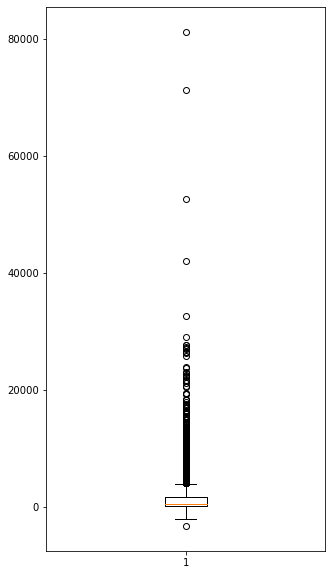

In [67]:
fig, ax = plt.subplots(figsize=(5,10))
plt.boxplot(df['saldo'])
plt.show()

In [68]:
df.pdias.value_counts()

-1      4672
 182      47
 183      41
 92       38
 91       33
        ... 
 312       1
 223       1
 382       1
 467       1
 6         1
Name: pdias, Length: 362, dtype: int64

In [69]:
df.dep_a_plazo.value_counts()

no     4000
yes    2021
Name: dep_a_plazo, dtype: int64

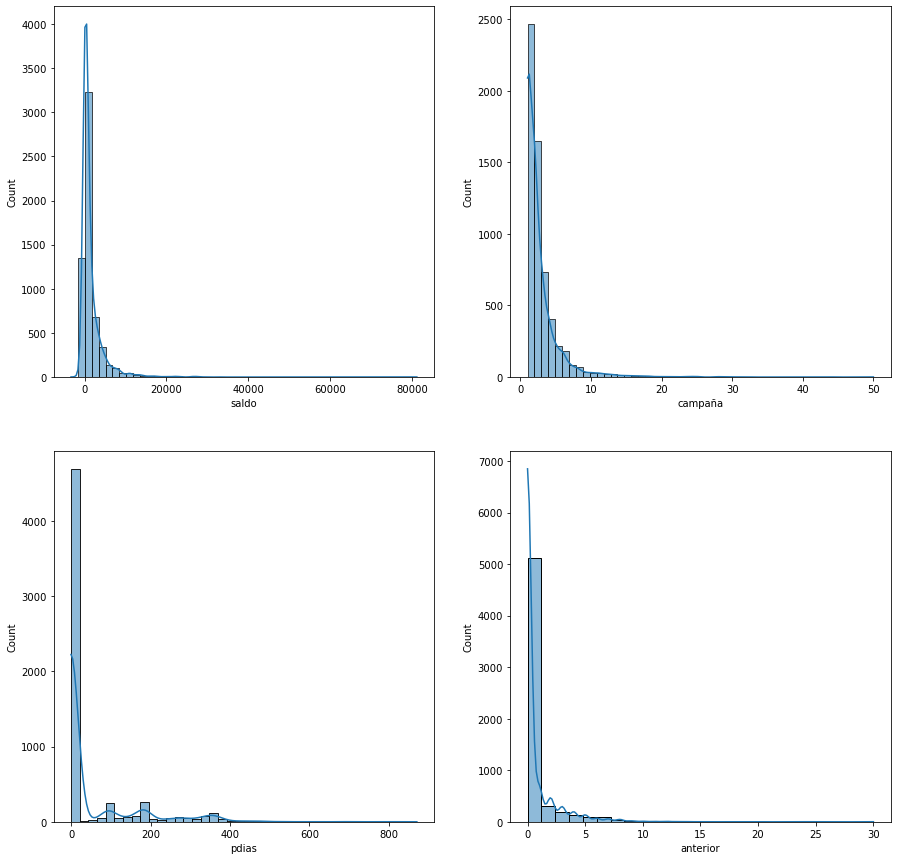

In [70]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
axes=ax.flatten()
sns.histplot(data=df.saldo, bins=50, kde=True, ax=axes[0])
sns.histplot(data=df.campaña, bins=50, kde=True, ax=axes[1])
sns.histplot(data=df.pdias, bins=40, kde=True, ax=axes[2])
sns.histplot(data=df.anterior, bins=25, kde=True, ax=axes[3]);

In [71]:
x1=df[df.pdias==-1].pdias.count()
x2=df[df.pdias!=-1].pdias.count()
px.pie(values=[x1,x2], names=['No se contactaron', 'Se contactaron'], width=480, height=400)

### De las personas que no fueron contactadas nunca ¿Cuántas pidieron el depósito?

In [72]:
import plotly.express as px
datos=df[df.pdias==-1].dep_a_plazo.value_counts()
px.pie(datos, values='dep_a_plazo', names=['no', 'yes'], width=400, height=400)

### De las personas que si fueron contactadas alguna vez ¿Cuántas pidieron el depósito?

In [73]:
datos=df[df.pdias!=-1].dep_a_plazo.value_counts()
px.pie(datos, values='dep_a_plazo', names=['no', 'yes'], width=400, height=400)

In [74]:
datos1=df[df.dep_a_plazo=='yes'].dia
datos2=df[df.dep_a_plazo=='yes'].mes

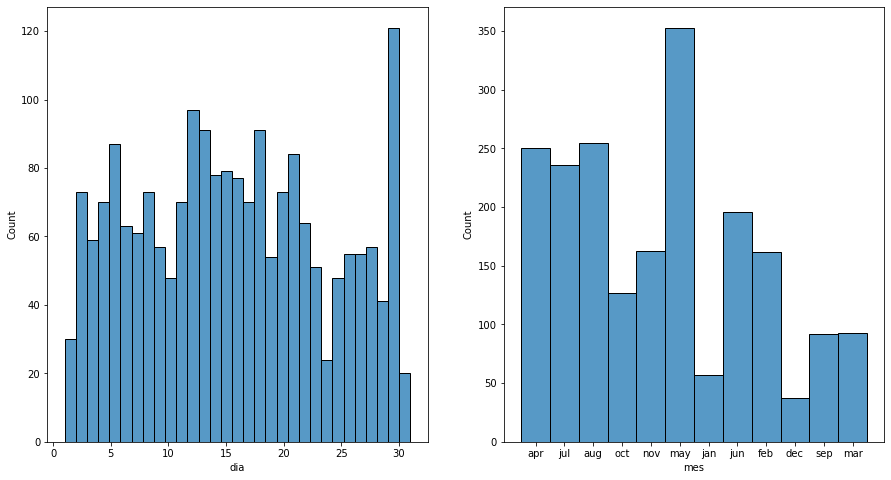

In [75]:
fig, axes =plt.subplots(1,2,figsize=(15,8))
sns.histplot(data=datos1, bins=31, ax=axes[0])
sns.histplot(data=datos2, bins=12, ax=axes[1]);

In [76]:
from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder

In [77]:
variables_cat=['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes', 'presultado'
               , 'dep_a_plazo']
codificador=LabelEncoder()

In [78]:
diccionario={}
diccionario2={}
for var  in variables_cat:   
    x=codificador.fit_transform(df[var])
    diccionario[var]=x
    diccionario2[var]=codificador.classes_
diccionario2

{'trabajo': array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 'estado_civil': array(['divorced', 'married', 'single'], dtype=object),
 'educacion': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'incumplimiento': array(['no', 'yes'], dtype=object),
 'vivienda': array(['no', 'yes'], dtype=object),
 'prestamo': array(['no', 'yes'], dtype=object),
 'contacto': array(['cellular', 'telephone', 'unknown'], dtype=object),
 'mes': array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 'presultado': array(['failure', 'other', 'success', 'unknown'], dtype=object),
 'dep_a_plazo': array(['no', 'yes'], dtype=object)}

In [79]:
df_=pd.DataFrame(diccionario)
df_codificado=pd.concat([df_,df.drop(columns=variables_cat+['dia'])], axis=1)
df_codificado

,trabajo,estado_civil,educacion,incumplimiento,vivienda,prestamo,contacto,mes,presultado,dep_a_plazo,edad,saldo,duracion,campaña,pdias,anterior
0,10,1,0,0,0,0,0,10,3,0,30,1787,79,1,-1,0
1,7,1,1,0,1,1,0,8,0,0,33,4789,220,1,339,4
2,4,2,2,0,1,0,0,0,0,0,35,1350,185,1,330,1
3,4,1,2,0,1,1,2,6,3,0,30,1476,199,4,-1,0
4,1,1,1,0,1,0,2,8,3,0,59,0,226,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6016,4,0,2,0,0,0,0,4,3,1,54,496,452,3,-1,0
6017,6,1,1,0,1,1,0,8,3,1,28,-522,638,2,-1,0
6018,5,1,0,0,0,0,1,11,3,1,81,1154,231,1,-1,0
6019,1,2,1,0,1,0,2,8,3,1,30,239,785,1,-1,0


In [80]:
variables_num=['edad', 'saldo', 'duracion','campaña', 'pdias', 'anterior' ]

In [81]:
Normalizador=Normalizer()
variables_num_normalizadas=Normalizador.fit_transform(df_codificado[variables_num])

In [82]:
df_num_norma=pd.DataFrame(variables_num_normalizadas, columns=variables_num)
df_num_norma

,edad,saldo,duracion,campaña,pdias,anterior
0,0.016769,0.998883,0.044159,0.000559,-0.000559,0.000000
1,0.006866,0.996434,0.045775,0.000208,0.070535,0.000832
2,0.024956,0.962605,0.131912,0.000713,0.235303,0.000713
3,0.020139,0.990829,0.133587,0.002685,-0.000671,0.000000
4,0.252592,0.000000,0.967554,0.004281,-0.004281,0.000000
...,...,...,...,...,...,...
6016,0.080210,0.736741,0.671385,0.004456,-0.001485,0.000000
6017,0.033947,-0.632870,0.773508,0.002425,-0.001212,0.000000
6018,0.068663,0.978233,0.195816,0.000848,-0.000848,0.000000
6019,0.036535,0.291064,0.956004,0.001218,-0.001218,0.000000


In [83]:
Codificador_Hot=OneHotEncoder(sparse=False)
variables_cat1=['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes',
                'presultado']         

In [84]:
y=Codificador_Hot.fit_transform(df_codificado[variables_cat1])

In [85]:
columnas=Codificador_Hot.get_feature_names(variables_cat1)
df_hot_cat=pd.DataFrame(y, columns=columnas)
df_hot_cat

,trabajo_0,trabajo_1,trabajo_2,trabajo_3,trabajo_4,trabajo_5,trabajo_6,trabajo_7,trabajo_8,trabajo_9,...,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,presultado_0,presultado_1,presultado_2,presultado_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6017,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6018,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [86]:
df_procesado=pd.concat([df_num_norma, df_hot_cat,df_codificado.drop(columns=variables_cat1 +variables_num)], axis=1)
df_procesado

,edad,saldo,duracion,campaña,pdias,anterior,trabajo_0,trabajo_1,trabajo_2,trabajo_3,...,mes_7,mes_8,mes_9,mes_10,mes_11,presultado_0,presultado_1,presultado_2,presultado_3,dep_a_plazo
0,0.016769,0.998883,0.044159,0.000559,-0.000559,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.006866,0.996434,0.045775,0.000208,0.070535,0.000832,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.024956,0.962605,0.131912,0.000713,0.235303,0.000713,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.020139,0.990829,0.133587,0.002685,-0.000671,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.252592,0.000000,0.967554,0.004281,-0.004281,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6016,0.080210,0.736741,0.671385,0.004456,-0.001485,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6017,0.033947,-0.632870,0.773508,0.002425,-0.001212,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6018,0.068663,0.978233,0.195816,0.000848,-0.000848,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
6019,0.036535,0.291064,0.956004,0.001218,-0.001218,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [87]:
df_procesado.to_csv("datos_procesados.csv",index=False)